In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import joblib
import sys
import os
import pandas as pd
import argparse
import warnings
warnings.filterwarnings("ignore")
import argparse
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np



In [15]:
# This script sets up a machine learning pipeline for predicting rifampicin resistance
# in Mycobacterium tuberculosis using the rpoABC gene variations dataset.
# It includes data preprocessing, model training, and evaluation using a
# fair and repeatable 10-fold cross-validation that preserves class balance
# Import necessary libraries



##############################################NEW SECTION OF CODE. - BALANCE THE CODE TO ENSURE ACCURACY  #####################################################

# Load dataset
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")

# Target encoding
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

# One-hot encode features
X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)

# Stratified CV for fairness
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Class balance:", y.value_counts(normalize=True))
print("X shape:", X.shape)


############################################## SAVE THE MODEL TO NEW PATH ###############################################################################################

## Prepares data for the ML Models
# Define the path to save the model
model_path = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance_model.pkl"
# Check if the model already exists
if os.path.exists(model_path):
    print("Model already exists. Loading the model...")
    model = joblib.load(model_path)
else:  
    print("Model does not exist. Creating a new model...")
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Create a pipeline with scaling and classifier
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    
    # Fit the model
    pipeline.fit(X, y)
    
    # Save the model
    joblib.dump(pipeline, model_path)
    print(f"Model saved to {model_path}")


############################################## # fair and repeatable 10-fold cross-validation that preserves class balance,##############################################################################################

from sklearn.model_selection import StratifiedKFold
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


############################################## # DEFINE THE RANDOM FOREST PIPELINE THERE IS AN ERROR IF I DO NOT INCLUDE TWO PIPELINES SO I ADDED LOGISTIC REGRESSION I HOPE IT IS OKAY HOWEVER I AM NOT SURE ##############################################################################################


logreg_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

rf_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

##############################################TRAIN AND TEST DATA##############################################################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,     
    random_state=42
)
print("Training set class balance:", y_train.value_counts(normalize=True))
print("Test set class balance:", y_test.value_counts(normalize=True))

############################################## HYPERTUNING THE MODEL ##############################################################################################

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Assume df is already loaded
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_encoded, y)

print("Best Parameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)
print("Best CV Accuracy:", random_search.best_score_)



#############################################CROSS VALIDATION FOR RANDOM FOREST##############################################################################################

from sklearn.model_selection import cross_val_score

best_params = random_search.best_params_

rf_best = RandomForestClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1
)

cv_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf_best, X_encoded, y, cv=cv_10)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))


#############################################CROSS VALIDATION FOR RANDOM FOREST##############################################################################################



from sklearn.model_selection import StratifiedKFold
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Initialize classifiers
classifiers = {
    'SVC': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}










Class balance: Resistance
1    0.5
0    0.5
Name: proportion, dtype: float64
X shape: (98, 197)
Model already exists. Loading the model...
Training set class balance: Resistance
0    0.5
1    0.5
Name: proportion, dtype: float64
Test set class balance: Resistance
1    0.5
0    0.5
Name: proportion, dtype: float64
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}
Best Estimator: RandomForestClassifier(max_depth=30, max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=150, n_jobs=-1,
                       random_state=42)
Best CV Accuracy: 0.9294736842105262
Cross-validation accuracies: [0.9        1.         1.         0.8        1.         0.7
 0.9        1.         0.88888889 1.        ]
Average accuracy: 0.9188888888888889


## Accuracy Graph and the Confusion Matrix for the Model could not fit fully in @aboves output

Accuracy: 0.95
              precision    recall  f1-score   support

           R       1.00      0.90      0.95        10
           S       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



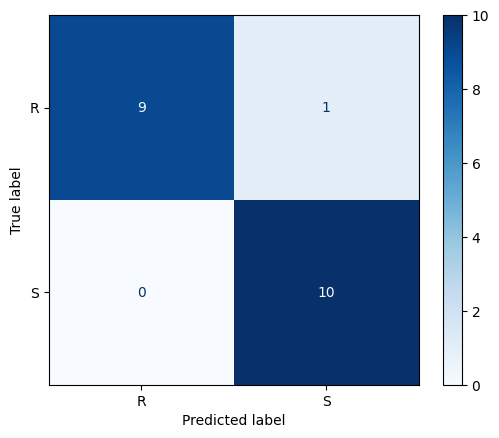

In [ ]:
#############################################FINAL ACCURACY GRAPH FOR THE MODEL ##############################################################################################

X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']

# Convert categorical features to numeric
X_encoded = pd.get_dummies(X)

# Use X_encoded here!
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # No max depth limit
    random_state=42,       
    n_jobs=-1              
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


############################################# CONFUSION MATRIX ##############################################################################################


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

